In [40]:
%matplotlib inline
import glob
import numpy as np
import matplotlib.pyplot as plt
import operator as op
from functools import reduce
from PIL import Image
import pandas as pd
IMAGES_BASE_PATH = '/run/media/twoaday/data-storag/data-sets/stanford-products-img-similarity/Stanford_Online_Products/'

In [2]:
image_lists = glob.glob("/run/media/twoaday/data-storag/data-sets/stanford-products-img-similarity/Stanford_Online_Products/*.txt")

In [3]:
image_lists

['/run/media/twoaday/data-storag/data-sets/stanford-products-img-similarity/Stanford_Online_Products/mug_final.txt',
 '/run/media/twoaday/data-storag/data-sets/stanford-products-img-similarity/Stanford_Online_Products/chair_final.txt',
 '/run/media/twoaday/data-storag/data-sets/stanford-products-img-similarity/Stanford_Online_Products/toaster_final.txt',
 '/run/media/twoaday/data-storag/data-sets/stanford-products-img-similarity/Stanford_Online_Products/Ebay_test.txt',
 '/run/media/twoaday/data-storag/data-sets/stanford-products-img-similarity/Stanford_Online_Products/table_final.txt',
 '/run/media/twoaday/data-storag/data-sets/stanford-products-img-similarity/Stanford_Online_Products/sofa_final.txt',
 '/run/media/twoaday/data-storag/data-sets/stanford-products-img-similarity/Stanford_Online_Products/stapler_final.txt',
 '/run/media/twoaday/data-storag/data-sets/stanford-products-img-similarity/Stanford_Online_Products/cabinet_final.txt',
 '/run/media/twoaday/data-storag/data-sets/stan

In [7]:
df_train = pd.read_csv('/run/media/twoaday/data-storag/data-sets/stanford-products-img-similarity/Stanford_Online_Products/Ebay_train.txt', delim_whitespace=True)
df_train.head()

,image_id,class_id,super_class_id,path
0,1,1,1,bicycle_final/111085122871_0.JPG
1,2,1,1,bicycle_final/111085122871_1.JPG
2,3,1,1,bicycle_final/111085122871_2.JPG
3,4,1,1,bicycle_final/111085122871_3.JPG
4,5,1,1,bicycle_final/111085122871_4.JPG


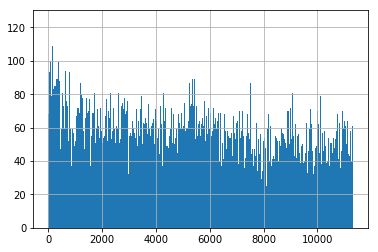

In [15]:
df_train.class_id.hist(bins=1000)

In [38]:
def show_img(img_path):
    img = Image.open(IMAGES_BASE_PATH + img_path)
    x, y = img.size
    im = np.array(img, dtype=np.uint8)
    print('{0} x {1}'.format(x, y))
    # Create figure and axes
    fig, ax = plt.subplots(1)
    # Display the image
    ax.imshow(im)
    plt.show()

400 x 400


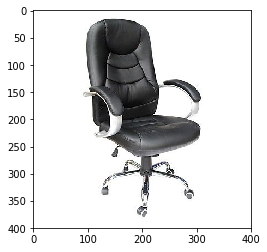

400 x 400


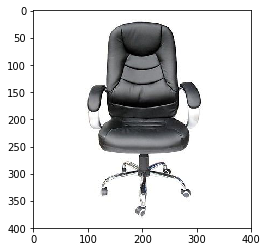

400 x 400


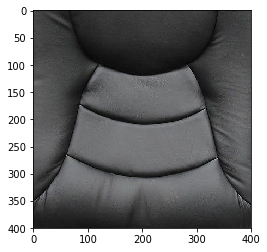

400 x 400


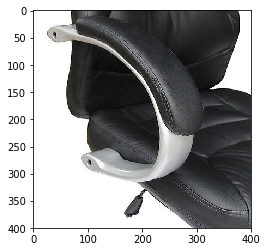

400 x 400


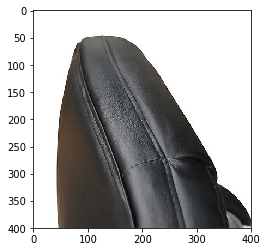

400 x 400


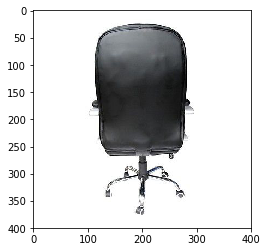

400 x 400


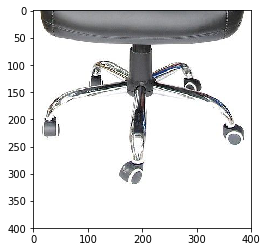

In [48]:
df_sample = df_train.loc[df_train.class_id == df_train.sample(1).class_id.values[0]]
for p in df_sample.path.values:
    show_img(p)

In [41]:
def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer / denom

In [49]:
sum(map(lambda x: min(ncr(x, 2), 2), df_train.groupby('class_id').count().path.values))

20498.0